# MCIS6273 Data Mining (Prof. Maull) / Fall 2017 / HW3

**This assignment is worth up to 20 POINTS to your grade total if you complete it on time.**

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 20 | Monday, Nov 6 @ Midnight | _up to_ 12 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by Univerisity or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* RESUBMIT HW2 PARTS 2 AND 3 (OPTIONAL):   Resubmit HW2 if you did not complete it

* BUILD A DECISION TREE CLASSIFIER:   Work with Pandas and Scikit to build a decision tree classifier on a real world dataset

* BUILD A BAYESIAN CLASSIFIER:   Work with Pandas and Scikit to explore the statistical features of a real world dataset using Bayesian classification

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, clone
[the course repository](https://github.com/kmsaumcis/mcis6273_f17_datamining) and modify
the `hw3.ipynb` file in the `homework/hw3` directory.  If you do not know
how to do this, please ask, or visit one of the many tutorials out there
on the basics of using Github and cloning repositories.

Turn in a copy of a `.ipynb` file, a PDF or Word Document to Blackboard
with the code or answers to the questions /tasks labeled with the &#167; sign.

## ASSIGNMENT TASKS
### (0%) RESUBMIT HW2 PARTS 2 AND 3 (OPTIONAL):   Resubmit HW2 if you did not complete it 

You can resubmit HW2 (parts 2 and 3 only) if you did not complete it.  If you completed it and would like to resubmit a revised version of your homework, you are free to do so.  If you resubmit part 1, you will incur the usual penalty, while there is **no** penalty for parts 2 and 3.

&#167;  Review HW2 and resumbit your work if necessary.


### (50%) BUILD A DECISION TREE CLASSIFIER:   Work with Pandas and Scikit to build a decision tree classifier on a real world dataset 

Continuing our work with classification, we're going to work with decision trees and use the [decision tree classification](http://scikit-learn.org/stable/modules/tree.html#classification)         tools in `sklearn`.   As we talked about in lecture, decision         trees are highly desireable for their interpretability.  It is often very easy to understand how a classification is performed and it is also very easy to use features of mixed types and avoid **some** (though not all) of the pre-processing work we labored through in the prior exercise, where data preparation was paramount.

The dataset for this task is adapted from yet another a [Kaggle dataset](https://www.kaggle.com/shivam2503/diamonds/data) that provides a large number of details about real diamonds for sale.  The dataset is nearly 54K rows of data with 10 features, but I have enhanced it for this assignment, so you will use the [file on Github](https://github.com/kmsaumcis/mcis6273_f17_datamining/blob/master/homework/hw3/data/diamonds_dirk_accept-reject.csv) for the actual task I am asking you to do in this assignment.

If you are unfamiliar with the features of diamonds [please read this very informative article](https://www.gia.edu/diamond-quality-factor) from the  [Gemological Institute of America](https://www.gia.edu/) (GIA), which should introduce you to some of the details of the attributes -- though understanding all these details is certainly not critical for completing the exercise, and is merely for your personal edification.

You are a data scientist for the diamond company, Sparkling Gems Inc., and you are trying to sell diamonds to one of the most prolific buyers on the market, Mr. Dirk Diamond.  Mr. Dirk buys and sells millions of dollars worth of diamonds and if we know what his purchasing criteria are, we might be able to improve our sales to him and hence our own profitablity.  Someone in the industry has found a notebook of thousands of Dirk's purchasing decisions in the last few years which include the details of diamonds he has accepted and rejected for purchase.

What we believe is if we can replicate his `ACCEPT` and `REJECT` criteria, then we might be able to find diamonds within our own inventory to sell to Mr. Dirk.  To determine if we can capture his purchasing rules, we have 2000 diamonds that he has accepted and rejected (roughly split down the middle).

You are to take those decisions he's made and build a binary decision tree classifier.  Split the data into a test and training set, build the classifier from the training set and test it on the remaining test set.

&#167;  Load the dataset of 2000 diamonds into a DataFrame and build a training set of 1400 diamonds.  Leave the remaining diamonds alone as a test set -- you will notice we're going to use a 70-30 split.  You can save a lot of time by using [`sklearn.model_selection.train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), but you are free to write you own code to do the same. You will need to eliminate the column `0\: Unnamed` as it contains an index value from the original file that you will not need.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
#Read given data and push it into pandas dataframe
diamonds_df = pd.read_csv('https://raw.githubusercontent.com/kmsaumcis/mcis6273_f17_datamining/master/homework/hw3/data/diamonds_dirk_accept-reject.csv')

# taken 2000 diamonds from the middle of the dataset
diamonds_df1 = diamonds_df[10000:12000]
sub_df=diamonds_df1.copy()
sub_df = sub_df.drop('Unnamed: 0',axis=1)
sub_df = sub_df.drop('x',axis=1)
sub_df = sub_df.drop('y',axis=1)
sub_df = sub_df.drop('z',axis=1)
sub_df = sub_df.drop('class',axis=1)


le = LabelEncoder()
sub_df['color'] = le.fit_transform(sub_df['color'])
sub_df['cut'] = le.fit_transform(sub_df['cut'])
sub_df['clarity'] = le.fit_transform(sub_df['clarity'])
acceptance_map = {'accept': 1, 'reject' : 0}
diamonds_df1['class'] = diamonds_df1['class'].map(acceptance_map)

#splitting the data as 70/30 ratio
x_train,x_test,y_train,y_test = train_test_split(sub_df,diamonds_df1['class'],test_size=0.30)




&#167;  Use the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class to build a decision tree classifier.  You can use the defaults for now (e.g. you can keep the default `criteria='gini'`).  To do this, you will need to use the following pattern:

  * take the training set DataFrame and split into a _features_ and _labels_ DataFrame, where features is the $n \times m$ matrix where $m$ is the number of features and $n$ the number of training samples, and _labels_ is an $n \times 1$ matrix of just the label for the corresponding sample.
  * use the decision classifier with the _features_ as the `X` parameter and _labels_ as the `y` parameter
  * **NOTE:** unfortunately, and as you learned in prior tasks, `sklearn` does not support text labels and so you will need to convert the `color`, `clarity` and `cut` variables to numeric (ordinal) variables.  The easiest way to do this is with [`sklearn.preprocessing.LabelEncoder().fit_transform()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state = 300, max_depth=3, min_samples_leaf=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=300, splitter='best')

&#167;  Use the [`sklearn.metrics.classification_report()`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to build the classification report that shows the precison, recall and f1-score of the classifier.

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
target_names = ['reject', 'accept']
print(classification_report(y_test, y_pred, target_names=target_names))
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)



             precision    recall  f1-score   support

     reject       1.00      0.96      0.98       314
     accept       0.95      1.00      0.97       286

avg / total       0.98      0.97      0.98       600

Accuracy is  97.5


&#167;  Draw the decision tree for this classifier.  To do this you will need to install _graphviz_ in Anaconda.  Please follow instructions found on [this page](http://scikit-learn.org/stable/modules/tree.html).  To draw the tree, once the package is installed, use [sklearn.tree.export_graphiz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) as shown in the example on the instruction page.  Make sure the tree shows up in your notebook and also export the file to PNG so I can have a separate digital copy of it.  Make sure you attach this PNG to your submission.

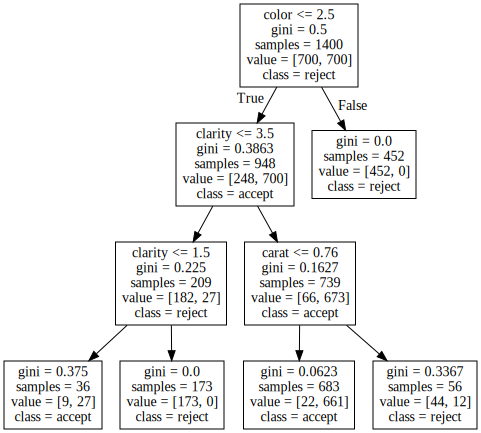

In [4]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x_train.columns, class_names=['reject','accept'])
graph = graphviz.Source(dot_data)
graph

In [5]:
from os import system
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()
system("dot -o dtree.dot; neato -n2 dtree.dot -Tpng -o dtree.png")



1

&#167;  Do you feel you have built a good classifier?  Why or why not?  Please use the evidence from the prior questions when answering this question.

Yes is feel i have built a good classfier because it is giving us ~96.5% which is better than 50/50 guessing. And f1_score is 0.97

&#167;  Now that you have a classifier for Mr. Dirk, use the file [`https://github.com/kmsaumcis/mcis6273_f17_datamining/tree/master/homework/hw3/data/sgi_diamond_inventory.csv`](https://github.com/kmsaumcis/mcis6273_f17_datamining/tree/master/homework/hw3/data/sgi_diamond_inventory.csv) to classify Sparkling Gem's inventory. Find all the diamonds that are classified `ACCEPT` by your classifiers.  You are free to rework the parameters of your decision tree if you think you can reduce the classification errors.

* export the data to a CSV file called `mr_dirk_inventory.csv` and make sure you attach this to your final submission.
* what is the _gross total sale amount_ if we were to sell all these diamonds to Mr. Dirk?

In [6]:
drik_df_orig = pd.read_csv('https://raw.githubusercontent.com/kmsaumcis/mcis6273_f17_datamining/master/homework/hw3/data/sgi_diamond_inventory.csv')
x_drik_df = drik_df_orig.copy()
x_drik_df = x_drik_df.drop('x',axis=1)
x_drik_df = x_drik_df.drop('y',axis=1)
x_drik_df = x_drik_df.drop('z',axis=1)
x_drik_df = x_drik_df.drop('Unnamed: 0',axis=1)
drik_df_orig.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1.10,Premium,G,VS2,60.2,58.0,6653,6.75,6.71,4.05
1,1,0.90,Ideal,H,SI2,61.9,55.0,4101,6.21,6.19,3.84
2,2,1.66,Ideal,H,VS1,61.5,56.0,15210,7.60,7.66,4.69
3,3,0.35,Very Good,G,VS1,61.5,60.0,676,4.51,4.57,2.79
4,4,1.04,Ideal,H,SI1,62.5,57.0,4648,6.50,6.46,4.05


In [7]:

le = LabelEncoder()
x_drik_df['color']=le.fit_transform(x_drik_df['color'])
x_drik_df['clarity']=le.fit_transform(x_drik_df['clarity'])
x_drik_df['cut']=le.fit_transform(x_drik_df['cut'])
drik_y_pred = clf.predict(x_drik_df)


In [8]:
drik_df_orig['class'] = drik_y_pred

drik_df_orig['class'] = drik_df_orig['class'].map({1:'accept',0:'reject'})
drik_df_orig.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,class
0,0,1.10,Premium,G,VS2,60.2,58.0,6653,6.75,6.71,4.05,reject
1,1,0.90,Ideal,H,SI2,61.9,55.0,4101,6.21,6.19,3.84,reject
2,2,1.66,Ideal,H,VS1,61.5,56.0,15210,7.60,7.66,4.69,reject
3,3,0.35,Very Good,G,VS1,61.5,60.0,676,4.51,4.57,2.79,reject
4,4,1.04,Ideal,H,SI1,62.5,57.0,4648,6.50,6.46,4.05,reject


In [9]:
drik_df_orig.to_csv('mr_dirk_inventory.csv')

In [10]:
accepted_gems = drik_df_orig[drik_df_orig['class'] == 'accept']
print("Number of diamonds sold :",accepted_gems.shape[0],"Total price value of Diamonds is :",accepted_gems['price'].sum(axis=0))

Number of diamonds sold : 1568 Total price value of Diamonds is : 2892840


&#167;  **[OPTIONAL BONUS]** _Completing this question will earn you 2 bonus points_. Pricing diamonds is tricky business, but Mr. Dirk is always one step ahead of most sellers.  He's very astute and most often likes to buy diamonds according to Tavernier's law; see [this resource](https://en.wikipedia.org/wiki/Diamonds_as_an_investment) for details.  Effectively, let $C$ be the _mean price_ of a 1 carat diamond, then Tavernier's Law ($\tau$) is calculated as
$$ \tau = W^2 \times C$$
where $W$ is the weight of the diamond in carats.  Please **provide code and evidence** for whether you think your diamond prices are more or less attractive to Mr. Dirk.

### (50%) BUILD A BAYESIAN CLASSIFIER:   Work with Pandas and Scikit to explore the statistical features of a real world dataset using Bayesian classification 

In this part of the assignment you will build a relatively simple Bayesian classifier.  The data we will be using comes from a subset of a large US Department of Transportation dataset of over 7M records [which you can optionally explore here](https://www.kaggle.com/jboysen/us-traffic-2015/data).  The data represents traffic volume from various places around the US, captured hourly for each day of data collection.  The dataset we have is a sample of less than 10% of the original data, and we'll restrict that further to capture just over 100K data points.

The DOT needs to understand traffic patterns, but in particular wants to understand the traffic patterns in urban areas.  What they'd like to do is build a classifier that, given a series of volume counts, can give the day of the week.  In other words given a data point representing the volume counts by hour, provide the day of the week.  The primary reason for building such a classifier is that some of the station data is not collecting day of week or has become unreliable.  Thus, they plan to use the reliable data to classify the missing and unreliable data as a quality control check.  They will keep the classifier that can achieve results above $0.80$.

Recall, the setup of our Bayesian problem, we want to find the classifier which given data $d$ about the volume counts, we can produce the day of the week, $C$, or:

$$ \Pr(C \big| d_1, \ldots, d_j) = \Pr( C ) \prod_i^n \Pr(  d_i \big| C ) $$

where $C$ is the day of the week and $d_j$ the traffic volume counts for the given time window in 1 hour increments over 24 hours.  Now we talked about how Naive Bayes works best in the context of discrete features, but `sklearn` provides a Bayes classifier over continuous features assumed to be Gaussian.  This assumption, while not strictly true, can be practically used in large datasets.  We will be using this classifier in the assignment.  Our probabilities are then computed as such:

$$ \Pr(  d_i \big| C ) = \frac{1}{\sqrt{2\pi\sigma_C^2}} \exp \bigg(-\frac{(x_i - \mu_C)^2}{2 \sigma_C^2}\bigg)$$

To perform this task will require you to train the classifier on some labeled data, test it, then use the provided unlabelled set to classify the day of week on unseen data.  The final class, $\hat{C}$ is then computed as :

$$ \hat{C} = \mathrm{argmax}_C \Pr( C ) \prod_i^n \Pr(  d_i \big| C ).$$

&#167;  Prepare the dataset that is to include **only** the traffic volume data where the `functional_classification_name` is `Urban: Principal Arterial - Interstate` since we want to make classifications **only** on urban interstate data.  Use the file [`data/dot_testtrain.csv`](https://github.com/kmsaumcis/mcis6273_f17_datamining/tree/master/homework/hw3/data/dot_testtrain.csv).

In [11]:
import pandas as pd

#Read given data and push it into pandas dataframe
dataset1 = pd.read_csv("https://raw.githubusercontent.com/kmsaumcis/mcis6273_f17_datamining/master/homework/hw3/data/dot_testtrain.csv")

dataset2 = dataset1[dataset1['functional_classification_name'] == 'Urban: Principal Arterial - Interstate']

dataset2.head()

,Unnamed: 0,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
3,3,2015-10-06,6,3,5,South,12,1U,Urban: Principal Arterial - Interstate,1,...,245,461,454,354,279,179,154,98,85,15
8,8,2015-05-29,29,6,7,West,56,1U,Urban: Principal Arterial - Interstate,1,...,491,409,436,361,341,261,214,135,157,15
9,9,2015-06-26,26,6,7,West,53,1U,Urban: Principal Arterial - Interstate,2,...,1371,1361,1300,908,687,597,468,272,122,15
12,12,2015-03-19,19,5,1,North,41,1U,Urban: Principal Arterial - Interstate,0,...,4697,4673,4526,4535,4352,3362,3111,2557,1459,15
15,15,2015-01-11,11,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,...,131,156,182,94,58,45,46,46,26,15


&#167;  Plot the **bar chart** of traffic volume by day of week for the following three times `traffic_volume_counted_after_0700_to_0800`, `traffic_volume_counted_after_2000_to_2100`, `traffic_volume_counted_after_1500_to_1600`.  That is group by `day_of_week` and plot the data in a single chart using `DataFrame.plot(kind='bar')` as in prior homeworks.

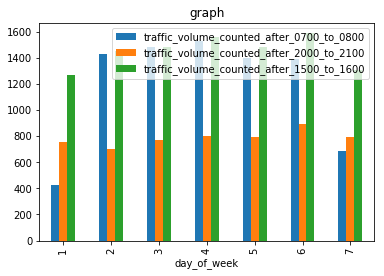

In [12]:
dataset3 = dataset2[['day_of_week','traffic_volume_counted_after_0700_to_0800','traffic_volume_counted_after_2000_to_2100','traffic_volume_counted_after_1500_to_1600']]
grouped_dataset = dataset3.groupby(['day_of_week'],as_index=False).mean() #Group data by day_of_week

import matplotlib.pyplot as plt

grouped_dataset.plot(kind='bar', x="day_of_week" ,title ="graph")
plt.show()
plt.close()


&#167;  Build the classifier over the `data/dot_testtrain.csv`, creating a 70-30 split of the data as in the prior exercise.  You will need to use the [`sklearn.naive_bayes.GaussianNB`](http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes).  Train the data on 70% of the samples and test on the remaining 30%.  The class labels in your classifier are the day of the week.

  * What is the overall classifier accuracy?  Show your code.

In [13]:
df_orig = pd.read_csv('https://raw.githubusercontent.com/kmsaumcis/mcis6273_f17_datamining/master/homework/hw3/data/dot_testtrain.csv')
#print(df_orig.columns)
df_split = df_orig[['traffic_volume_counted_after_0000_to_0100','traffic_volume_counted_after_0100_to_0200','traffic_volume_counted_after_0200_to_0300','traffic_volume_counted_after_0300_to_0400','traffic_volume_counted_after_0400_to_0500','traffic_volume_counted_after_0500_to_0600','traffic_volume_counted_after_0600_to_0700','traffic_volume_counted_after_0700_to_0800','traffic_volume_counted_after_0800_to_0900','traffic_volume_counted_after_0900_to_1000','traffic_volume_counted_after_1000_to_1100','traffic_volume_counted_after_1100_to_1200','traffic_volume_counted_after_1200_to_1300','traffic_volume_counted_after_1300_to_1400','traffic_volume_counted_after_1400_to_1500','traffic_volume_counted_after_1500_to_1600','traffic_volume_counted_after_1600_to_1700','traffic_volume_counted_after_1700_to_1800','traffic_volume_counted_after_1800_to_1900','traffic_volume_counted_after_1900_to_2000','traffic_volume_counted_after_2000_to_2100','traffic_volume_counted_after_2100_to_2200','traffic_volume_counted_after_2200_to_2300','traffic_volume_counted_after_2300_to_2400']]
x_train,x_test,y_train,y_test = train_test_split(df_split,df_orig['day_of_week'],test_size=0.30, random_state=300)


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)
#y_test = x_test['day_of_week']
print ("Accuracy is ", accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))


Accuracy is  0.171166666667
             precision    recall  f1-score   support

          1       0.16      0.91      0.27      2449
          2       0.14      0.01      0.02      2597
          3       0.22      0.08      0.12      2606
          4       0.21      0.10      0.14      2610
          5       0.16      0.00      0.01      2579
          6       0.19      0.09      0.12      2535
          7       0.34      0.05      0.09      2624

avg / total       0.20      0.17      0.11     18000



&#167;  Now that you have a classifier, load the data in [`data/dot_validate`](https://github.com/kmsaumcis/mcis6273_f17_datamining/tree/master/homework/hw3/data/dot_validate.csv) and run your classifier on the data.  Add the class label back to the unlabeled DataFrame onto a column `nb_classifier_label` and save the file back as `dot_validate_labeled.csv`.  Make sure you attach the file to your submission.

In [15]:
df_validate = pd.read_csv('https://raw.githubusercontent.com/kmsaumcis/mcis6273_f17_datamining/master/homework/hw3/data/dot_validate.csv')
#print(df_validate.columns)

In [16]:
df_validate1 = df_validate.copy()  
df_validate1 = df_validate1.drop('Unnamed: 0',axis=1)
df_validate1 = df_validate1.drop('day_of_week',axis=1)

y_pred_df_validate = gnb.predict(df_validate1)
df_validate['nb_classfier_label'] = y_pred_df_validate
df_validate.head()

,Unnamed: 0,day_of_week,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,nb_classfier_label
0,60000,2,38,22,31,33,71,223,491,1113,...,769,805,779,647,443,291,211,122,105,3
1,60001,7,593,381,275,209,233,354,700,1137,...,2621,2373,2167,1958,1602,1356,1313,1177,1059,6
2,60002,3,0,0,0,0,0,1,3,12,...,21,27,10,8,3,2,5,0,0,1
3,60003,2,232,123,120,170,354,1042,1725,1731,...,1417,1386,1401,1273,1078,876,766,521,392,4
4,60004,2,59,52,39,38,124,319,636,735,...,550,608,523,444,299,235,204,133,66,1


&#167;  The DOT stakeholder would like to know whether you achieved the desired result of $0.80$ accuracy.  Did you achieve this with your classifier?  Explain with the appropriate level of evidence.  Produce a classification report and show the precision, recall and f1-score as well.

In [17]:
y_test = df_validate['day_of_week']
y_pred = y_pred_df_validate
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print(classification_report(df_validate['day_of_week'],y_pred_df_validate))

Accuracy is  17.7627272727
             precision    recall  f1-score   support

          1       0.17      0.92      0.28     61925
          2       0.15      0.01      0.02     62292
          3       0.24      0.08      0.12     62600
          4       0.20      0.10      0.14     62990
          5       0.19      0.00      0.01     64139
          6       0.18      0.08      0.11     62790
          7       0.37      0.06      0.10     63264

avg / total       0.21      0.18      0.11    440000



No we have not got the 80% accuracy. Because we have received accuracy of 18% and f1-score 0.11

In [18]:
df_validate.to_csv("dot_validate_labeled.csv")

&#167;  **[OPTIONAL BONUS]**: _Doing this bonus can earn you up to 5 extra points varying on completeness and correctness of your effort_.  Train the classifier to classify `functional_classification_name`.  That is, the class you're trying to predict is the `functional_classification_name`.  You are free to add back in the `day_of_week` should you find it useful and you should add back in all the other data (use the full data file and not just the urban data as above).  You will, of course, need to remove `functional_classification_name` as it is the class you're trying to predict.